#Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium 

indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not


The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [76]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('Company_Data.csv')
features.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#EDA


In [77]:
#getting information of dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [78]:
print('The shape of our features is:', features.shape)

The shape of our features is: (400, 11)


In [79]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

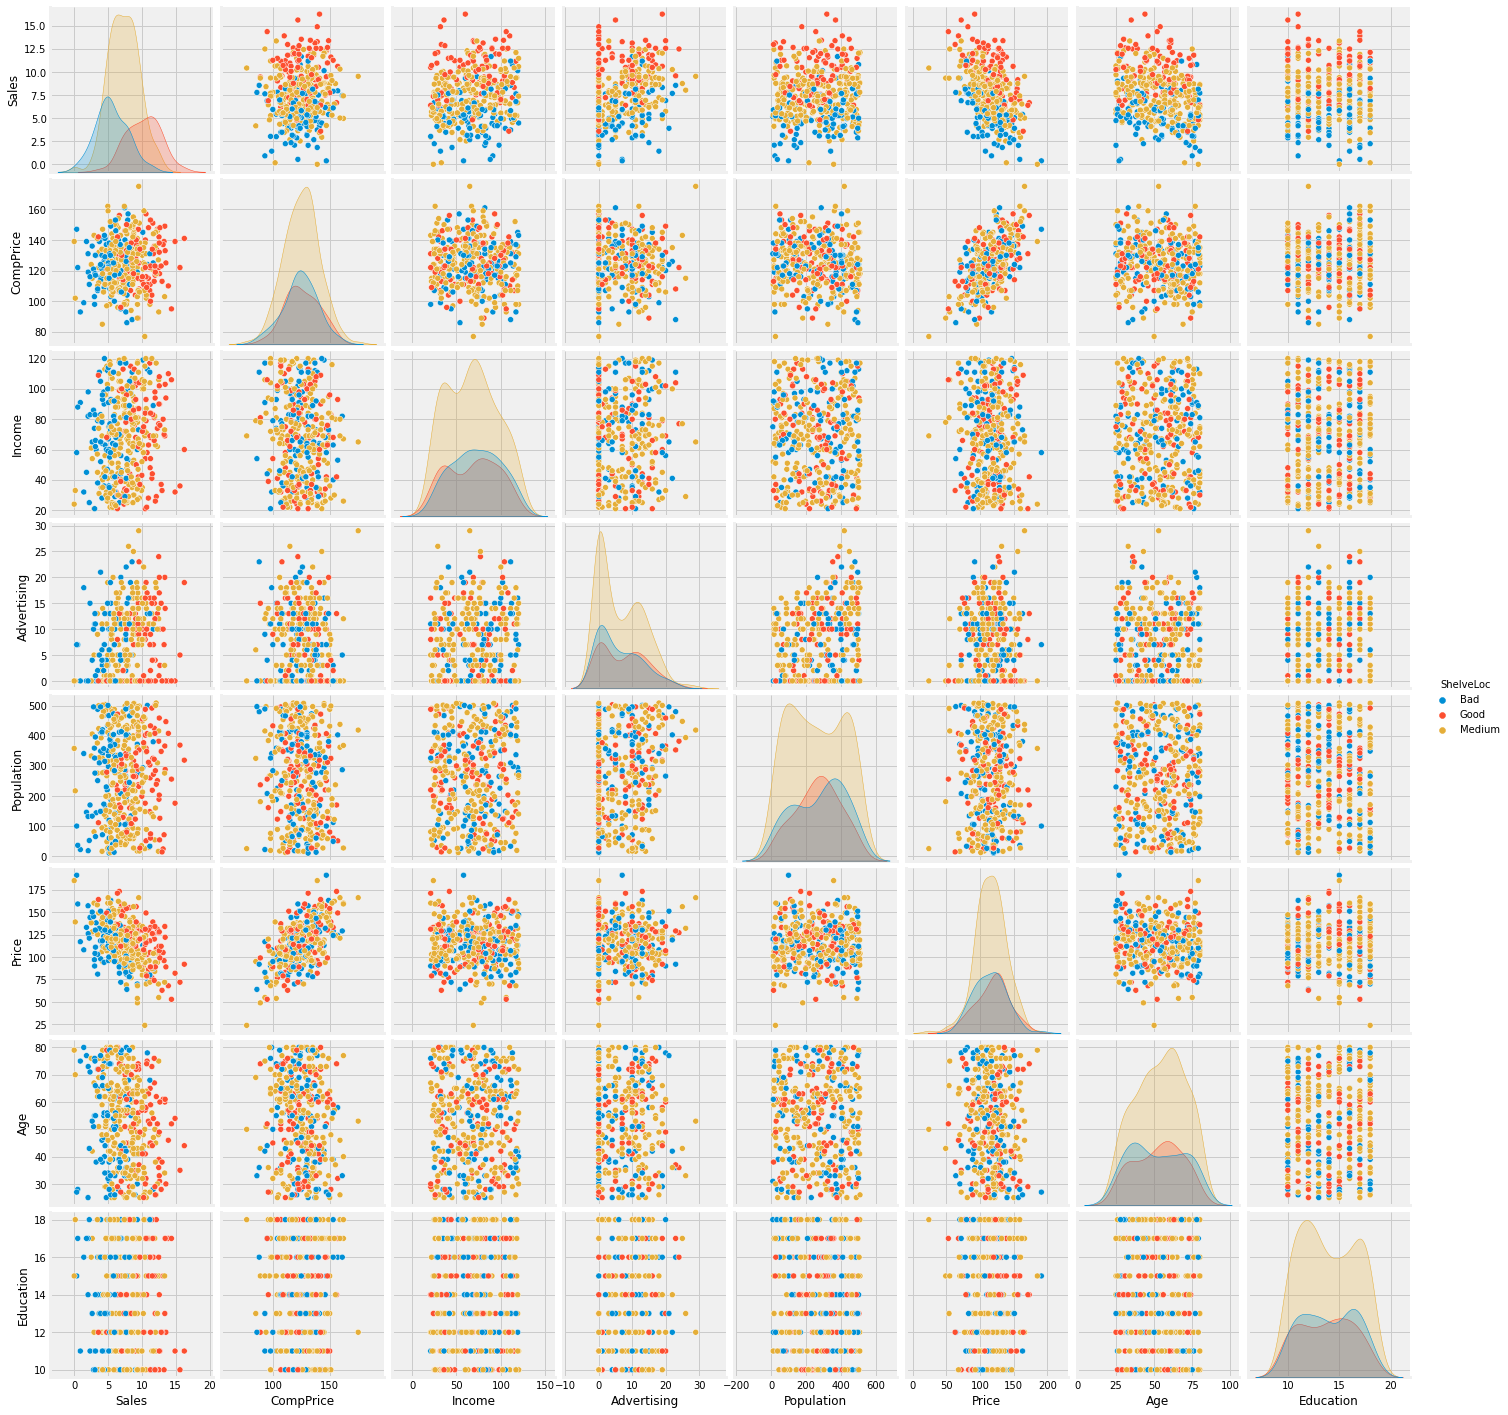

In [80]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=features,hue = 'ShelveLoc')

In [7]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [8]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [9]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [10]:

df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [11]:

print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [14]:
x=df.iloc[:,1:11]
y=df['Sales']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [15]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [16]:
df['ShelveLoc'].unique()

array([3, 1, 2])

In [17]:
df.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [18]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [19]:
# Descriptive statistics for each column
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [20]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [22]:
# Labels are the values we want to predict
labels = np.array(df['Sales'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Sales', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)

In [23]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)                                                                  

In [24]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300, 11)
Training Labels Shape: (300,)
Testing Features Shape: (100, 11)
Testing Labels Shape: (100,)


#Establish Baseline

In [25]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('Sales')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.0


In [26]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


#Determine Performance Metrics

In [28]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.36 %.


In [29]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [30]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [31]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Sales                Importance: 1.0
Variable: CompPrice            Importance: 0.0
Variable: Income               Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


In [32]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Sales'), feature_list.index('Income')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.04 degrees.
Accuracy: 99.41 %.


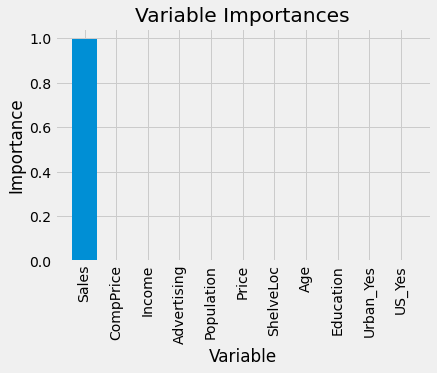

In [33]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


#Business Problem:

#Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [35]:
data=pd.read_csv('Fraud_check.csv',encoding='latin1')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [37]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [38]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [39]:
df=data.copy()
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [40]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [42]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [43]:
df.drop(['Taxable.Income'],axis=1,inplace=True)
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [44]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['tax_class']= label_encoder.fit_transform(df['tax_class'])

In [45]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [47]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


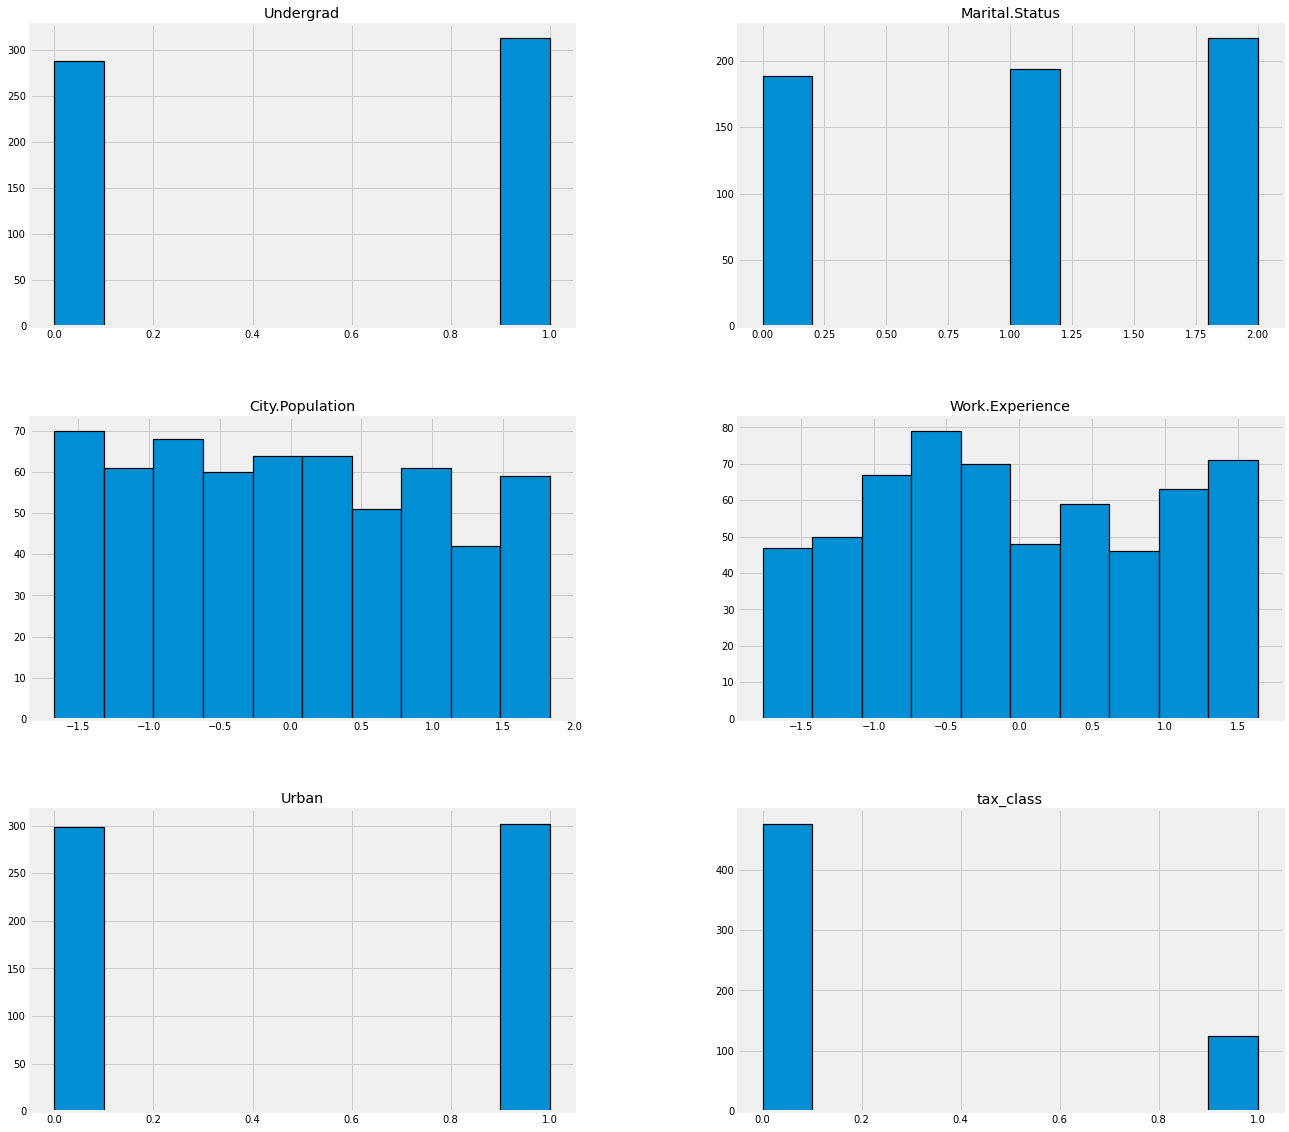

In [48]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [49]:
df.to_csv('auto.csv')

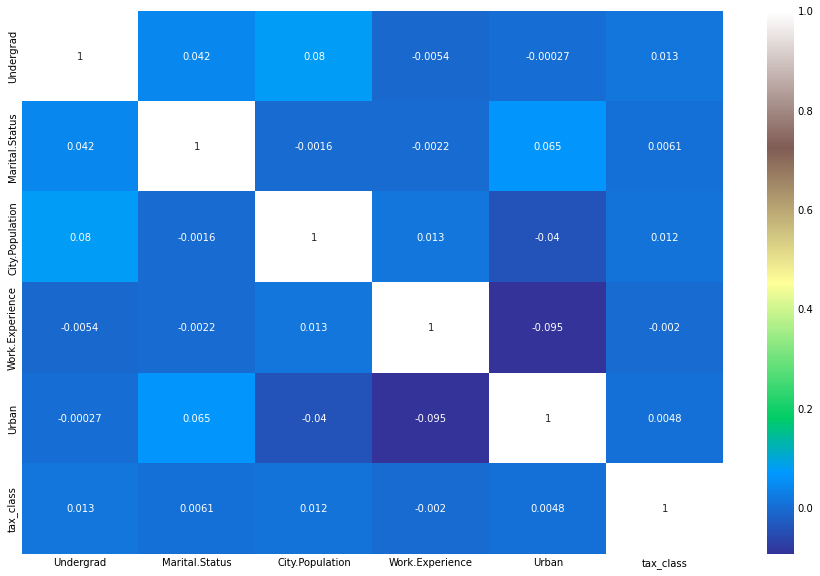

In [50]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [51]:
pdata=df.copy()
pdata.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0


In [52]:
x=pdata.iloc[:,0:-1]
y=pdata['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

#Model building using Random forest


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier 

In [54]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.7666666666666667


#Using grid search optimisation

from sklearn.model_selection import GridSearchCV gmodel=RandomForestClassifier() param_grid=({'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)}) grid=GridSearchCV(gmodel,param_grid) grid.fit(x,y) print(grid.bestscore) print(grid.bestparams)

In [55]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.7966666666666666


In [56]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.7979166666666667


#Applying K-Fold cross Validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


#Bagging

In [58]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


#Boosting

In [59]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7549999999999999


Voting classifier

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(base_estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(base_estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [ ]:
print(results.mean())

0.7933333333333332


#
XGBM

In [61]:
from tqdm.notebook import tqdm, trange
import time
# First XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier()

In [63]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [64]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [65]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.33%


In [66]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.62%
